In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
datasetdir = "C:/Users/naouf/Documents/1-Naoufel/1-projet/8-CNN-Chat et Chien/CNN-Chat-Chien"
os.chdir(datasetdir)


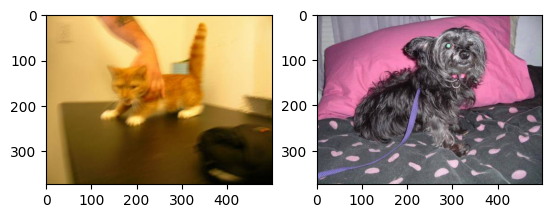

In [2]:
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

plt.subplot(1,2,1)
plt.imshow(img.imread('cats/cat.0.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('dogs/dog.0.jpg'))

In [3]:
images = []
for i in range(10):
  im = img.imread('cats/cat.{}.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (374, 500, 3) maximum color level 255
image shape (280, 300, 3) maximum color level 248
image shape (396, 312, 3) maximum color level 255
image shape (414, 500, 3) maximum color level 255
image shape (375, 499, 3) maximum color level 255
image shape (144, 175, 3) maximum color level 255
image shape (303, 400, 3) maximum color level 255
image shape (499, 495, 3) maximum color level 255
image shape (345, 461, 3) maximum color level 255
image shape (425, 320, 3) maximum color level 247


In [4]:
bad_dog_ids = [1043, 1259, 1895, 2614, 2877, 4367, 5604,6405, 6413, 8736, 8898, 9188, 9517, 10161, 
               10190, 10237, 10401, 10797, 10801,11094,  11186, 11299 ]

bad_cat_ids = [92, 2939, 3216, 3672, 4338, 4688, 4833, 5351, 5418, 6215, 7377, 7564,7968,
               8456, 8470, 9171,10029,10712,11222, 11565, 12272]

In [6]:
def load_images(ids, categ):
  '''retourne les images correspondant à une liste d'indices, 
  pour une catégorie donnée (cat ou dog)
  '''
  images = []
  dirname = categ+'s' # dog -> dogs
  for theid in ids: 
    fname = '{dirname}/{categ}.{theid}.jpg'.format(
        dirname=dirname,
        categ=categ, 
        theid=theid
    )
    im = img.imread(fname)
    images.append(im)
  return images

In [7]:
bad_dogs = load_images(bad_dog_ids, 'dog')
bad_cats = load_images(bad_cat_ids, 'cat')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\naouf\\Documents\\1-Naoufel\\1-projet\\8-CNN-Chat et Chien\\CNN-Chat-Chien\\dogs\\dog.1043.jpg'

In [8]:
def plot_images(images, ids):
    ncols, nrows = 4, 3
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img, theid) in enumerate(zip(images,ids)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img)
      plt.title(str(theid))
      plt.axis('off')

In [9]:
plot_images(bad_dogs, bad_dog_ids)

NameError: name 'bad_dogs' is not defined

In [10]:
import glob
import re
import shutil

# ce pattern correspond à n'importe quelle chaîne de 
# caractères contenant ".<chiffres>.", 
# comme dog.666.jpg
pattern = re.compile(r'.*\.(\d+)\..*')

def trash_path(dirname):
    '''retourne le chemin vers le répertoire poubelle 
    (Trash/cats/ ou Trash/dogs/),
    ou les images de mauvais chiens et chats seront déplacées. 
    Notez que ce répertoire ne doit pas être dans cats/ ou dogs/, 
    ou Keras sera quand même capable de les trouver. 
    '''
    return os.path.join('../Trash', dirname)

def cleanup(ids, dirname): 
  '''déplace dans la poubelle les images de dirname contenant ces indices
  '''
  os.chdir(datasetdir)
  # garde la trace du répertoire courant  
  oldpwd = os.getcwd()
  # on va soit dans cats/ soit dans dogs/ 
  os.chdir(dirname)
  # on crée le répertoire poubelle. 
  # s'il existe, on le supprime et on le recrée.
  trash = trash_path(dirname)
  if os.path.isdir(trash):
    shutil.rmtree(trash)
  os.makedirs(trash, exist_ok=True)
  # boucle sur toutes les images de chiens ou de chats
  fnames = os.listdir()
  for fname in fnames:
    m = pattern.match(fname)
    if m: 
      # extraction de l'indice
      the_id = int(m.group(1))
      if the_id in ids:
        # cet indice correspond effectivement à une image 
        # qu'il faut virer
        print('moving to {}: {}'.format(trash, fname))
        shutil.move(fname, trash)
  # on retourne au répertoire du dataset
  os.chdir(oldpwd)
  
def restore(dirname):
  '''Restaure les fichiers de la poubelle.
  J'aurai besoin de cette fonction pour ramener ce tutorial à son 
  état initial pour vous. Et vous pourriez en avoir besoin si vous voulez
  tester le réseau sans avoir effectué le toilettage auparavant. 
  '''
  os.chdir(datasetdir)
  oldpwd = os.getcwd()
  os.chdir(dirname)
  trash = trash_path(dirname)
  print(trash)
  for fname in os.listdir(trash):
    fname = os.path.join(trash,fname)
    print('restoring', fname)
    print(os.getcwd())
    shutil.move(fname, os.getcwd())
  os.chdir(oldpwd)

In [11]:
cleanup(bad_cat_ids,'cats')

In [12]:
cleanup(bad_dog_ids, 'dogs')

In [ ]:
# restore('dogs')
# restore('cats')

In [13]:
gen = ImageDataGenerator()

In [14]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('dogs','cats')
)

Found 24957 images belonging to 2 classes.


In [16]:
# tous les itérateurs python ont une fonction next()
batch = next(iterator)
len(batch)
print(batch)

(array([[[[ 88., 105., 112.],
         [ 91., 108., 115.],
         [ 81.,  98., 105.],
         ...,
         [ 19.,  21.,  10.],
         [ 20.,  27.,  19.],
         [ 19.,  26.,  18.]],

        [[ 62.,  75.,  81.],
         [ 52.,  67.,  70.],
         [ 59.,  74.,  77.],
         ...,
         [ 27.,  30.,  23.],
         [ 21.,  27.,  15.],
         [ 23.,  26.,  17.]],

        [[ 50.,  60.,  61.],
         [ 57.,  67.,  68.],
         [ 52.,  62.,  63.],
         ...,
         [ 23.,  25.,  22.],
         [ 25.,  27.,  14.],
         [ 27.,  27.,  15.]],

        ...,

        [[ 21.,  50.,  84.],
         [ 22.,  51.,  83.],
         [ 25.,  54.,  86.],
         ...,
         [ 59.,  45.,  34.],
         [ 57.,  43.,  34.],
         [ 57.,  43.,  34.]],

        [[ 28.,  54.,  91.],
         [ 26.,  52.,  89.],
         [ 22.,  48.,  85.],
         ...,
         [ 53.,  41.,  27.],
         [ 54.,  40.,  31.],
         [ 53.,  39.,  30.]],

        [[ 28.,  54.,  91.],
      

In [19]:
print(batch[0][1][1])
print(batch[1])

[[[33. 33. 25.]
  [28. 28. 20.]
  [32. 32. 24.]
  ...
  [ 9.  8.  6.]
  [ 9.  8.  6.]
  [ 9.  8.  6.]]

 [[32. 32. 24.]
  [29. 29. 21.]
  [33. 33. 25.]
  ...
  [ 9.  8.  6.]
  [ 9.  8.  6.]
  [ 9.  8.  6.]]

 [[34. 34. 26.]
  [31. 31. 23.]
  [36. 36. 28.]
  ...
  [ 9.  8.  6.]
  [ 9.  8.  6.]
  [ 9.  8.  6.]]

 ...

 [[16. 16. 16.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [19. 18. 14.]
  [19. 18. 14.]
  [19. 18. 14.]]

 [[16. 16. 16.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [19. 18. 14.]
  [19. 18. 14.]
  [19. 18. 14.]]

 [[16. 16. 16.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [19. 18. 14.]
  [20. 19. 15.]
  [20. 19. 15.]]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [18]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


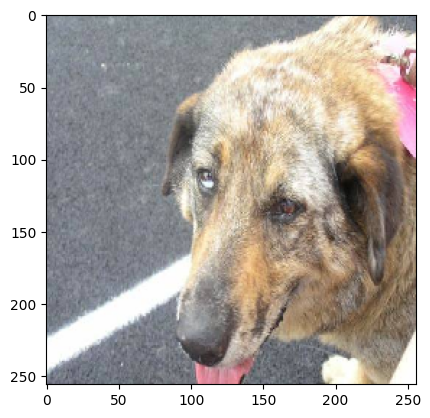

In [19]:
import numpy as np
# il faut caster l'image vers un tableau d'entier
# avant de la tracer car imshow prend 
# soit un tableau d'entiers
# soit un tableau de réels entre 0. et 1. 
plt.imshow(batch[0][0].astype(int))


In [20]:
batch[1][0]

array([1., 0.], dtype=float32)

In [21]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4, 8
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img, label) in enumerate(zip(imgs, labels)):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img.astype(int))
        assert(label[0] + label[1] == 1.)
        categ = 'dog' if label[0] > 0.5 else 'cat'
        plt.title('{} {}'.format(str(label), categ))
        plt.axis('off')


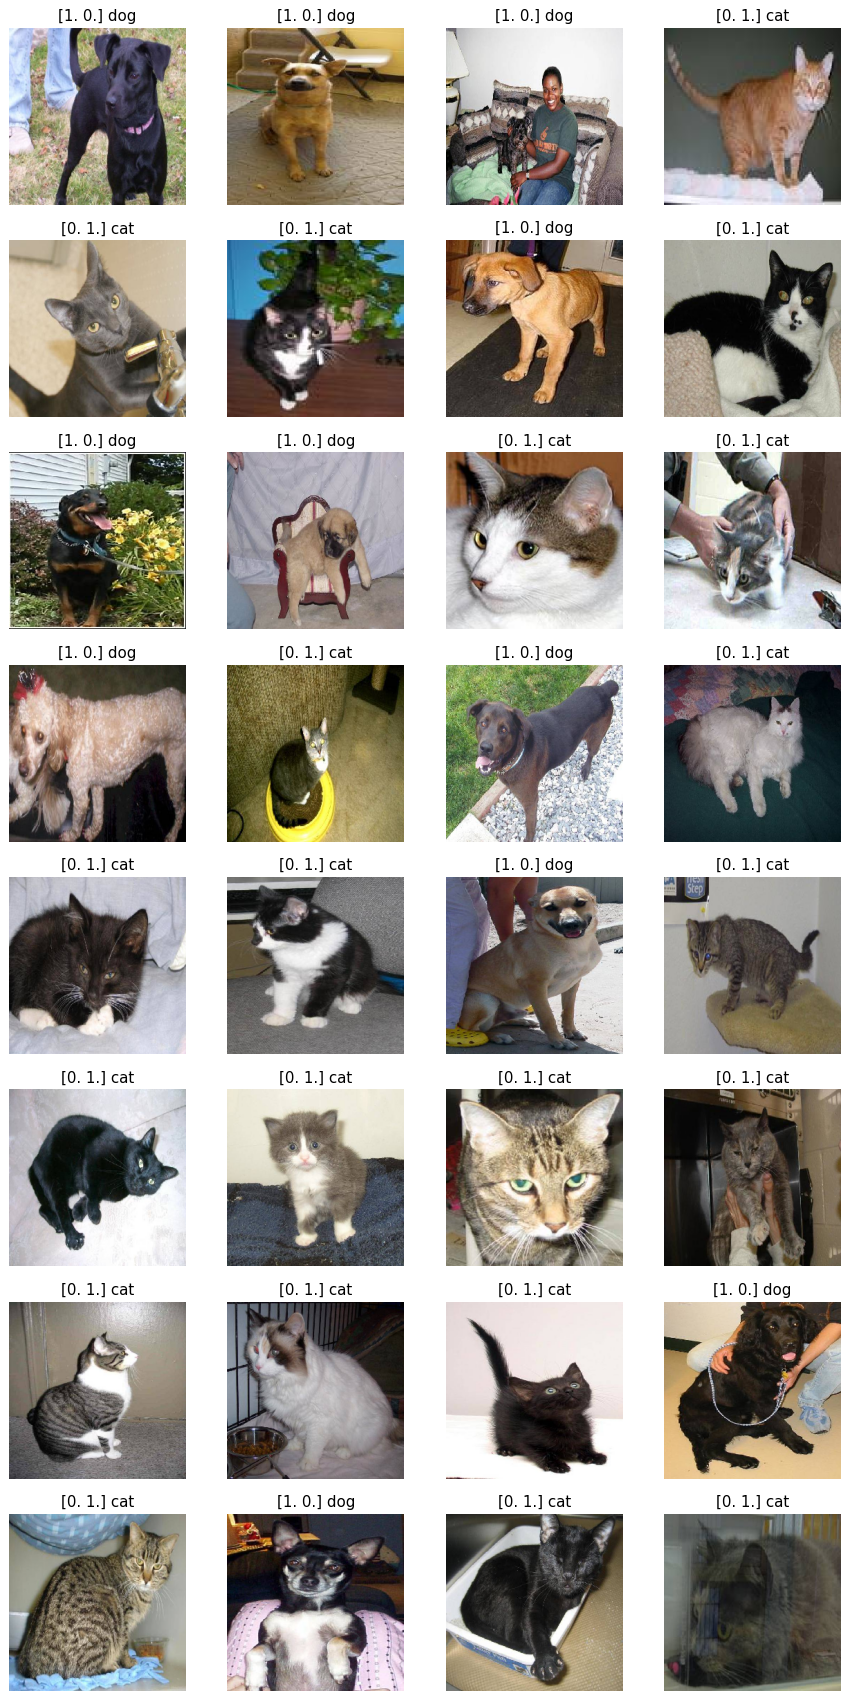

In [22]:
plot_images(next(iterator))

In [23]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [24]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 19967 images belonging to 2 classes.
Found 4990 images belonging to 2 classes.


In [25]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

c:\Users\naouf\Documents\1-Naoufel\1-projet\8-CNN-Chat et Chien\CNN-Chat-Chien\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 24)   │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 48)   │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       623,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])


In [27]:
history = model.fit(
    train_dataset,  # Dataset d'entraînement
    validation_data=val_dataset,  # Dataset de validation
    epochs=1  # Nombre d'époques d'entraînement
)


c:\Users\naouf\Documents\1-Naoufel\1-projet\8-CNN-Chat et Chien\CNN-Chat-Chien\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


666/666 ━━━━━━━━━━━━━━━━━━━━ 536s 799ms/step - acc: 0.5790 - loss: 0.6664 - val_acc: 0.7281 - val_loss: 0.5441


In [28]:
def plot_history(history, yrange):
    '''Trace le coût et la précision en fonction de l'époque, 
    pour les échantillons d'entraînement et de validation. 
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # époques
    epochs = range(len(acc))

    # précision en fonction de l'époque
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # coût en fonction de l'époque
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

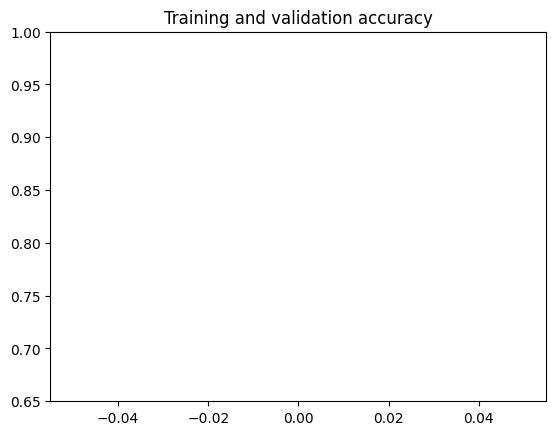

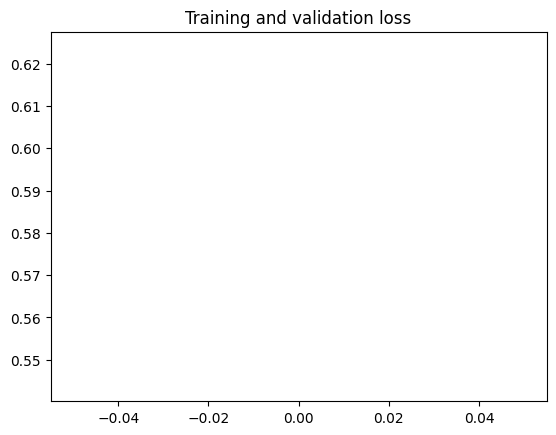

In [29]:
plot_history(history, (0.65, 1.))

In [30]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    validation_split = 0.2,
)

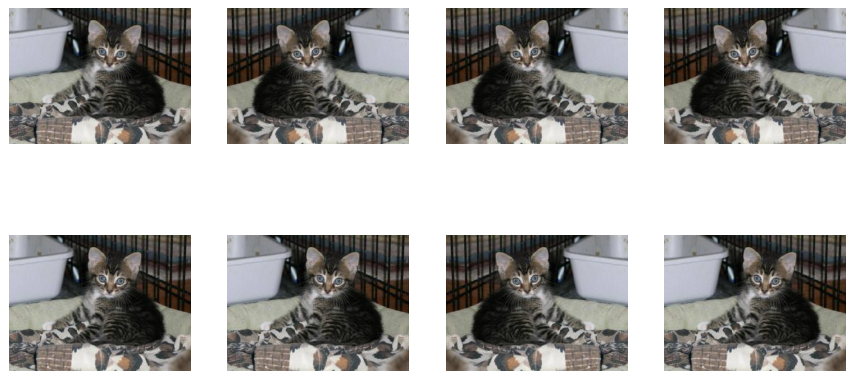

In [31]:
image = img.imread('cats/cat.12.jpg')

def plot_transform():
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

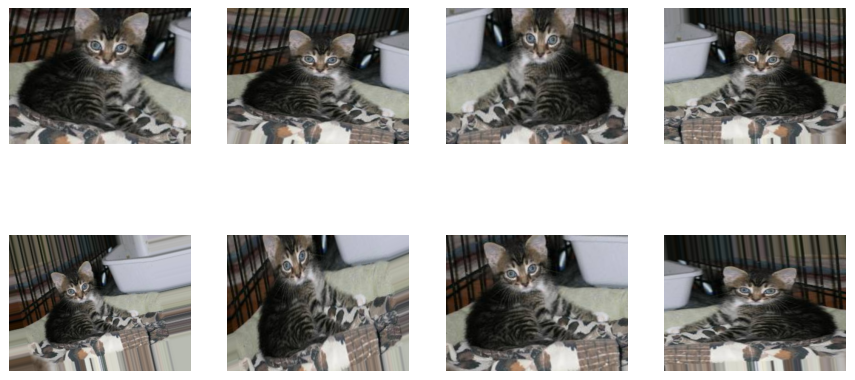

In [37]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()

In [33]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 22463 images belonging to 2 classes.
Found 2494 images belonging to 2 classes.


In [34]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 252, 252, 24)   │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 48)   │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │       623,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])
history_augm = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    # steps_per_epoch=10,
    
    epochs=1
)

c:\Users\naouf\Documents\1-Naoufel\1-projet\8-CNN-Chat et Chien\CNN-Chat-Chien\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


749/749 ━━━━━━━━━━━━━━━━━━━━ 639s 849ms/step - acc: 0.5759 - loss: 0.6960 - val_acc: 0.7438 - val_loss: 0.5369


In [38]:
model.save('model_1epoch.h5')

In [55]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('C:/Users/naouf/Documents/1-Naoufel/1-projet/8-CNN-Chat et Chien/CNN-Chat-Chien/model04_augm25_epoch .h5')

In [56]:
import numpy as np


def evaluate(img_fname):
    # Charger l'image avec les bonnes dimensions
    img = image.load_img(img_fname, target_size=(256, 256))
    # Convertir l'image en tableau numpy et normaliser les valeurs de pixel
    x = image.img_to_array(img) / 255.0
    # Ajouter une dimension supplémentaire pour correspondre à la forme attendue par le modèle
    x = np.expand_dims(x, axis=0)
    # Faire une prédiction avec le modèle
    preds = model.predict(x)
    # Afficher les probabilités et les noms de catégorie pour les 2 catégories
    print('Prédictions:', preds)
    if preds[0][0] > preds[0][1]:
        print("C'est un chien.")
    else:
        print("C'est un chat.")


In [57]:
evaluate('testphoto.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prédictions: [[1.4872609e-05 9.9998510e-01]]
C'est un chat.
